# Predict Loan Eligibility for Dream Housing Finance company


Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 



# Reading Data

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.style.use(['dark_background'])
import warnings
warnings.filterwarnings("ignore")

 Reading data

In [5]:
#training sets
train =pd.read_csv("train_ctrUa4K.csv")

#testing sets
test = pd.read_csv("test_lAUu6dG.csv")

In [6]:
#making a copy of training & testing datasets 
train_original = train.copy()
test_original = test.copy()

In [7]:
test.columns 

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [8]:
#Data types of Datasets 
train.dtypes 

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
train.shape 

(614, 13)

In [10]:
test.shape 

(367, 12)

# Data exploration & transformation 

For categorial feautures we will use bar plots or frequency tabl && for numerial features we will use probality density plots.


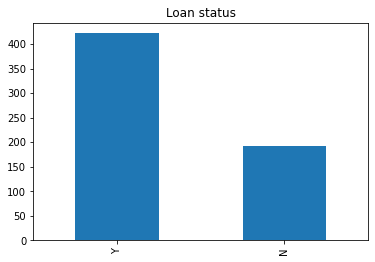

In [11]:
train['Loan_Status'].value_counts().plot.bar(title= 'Loan status');
plt.savefig('loan status')

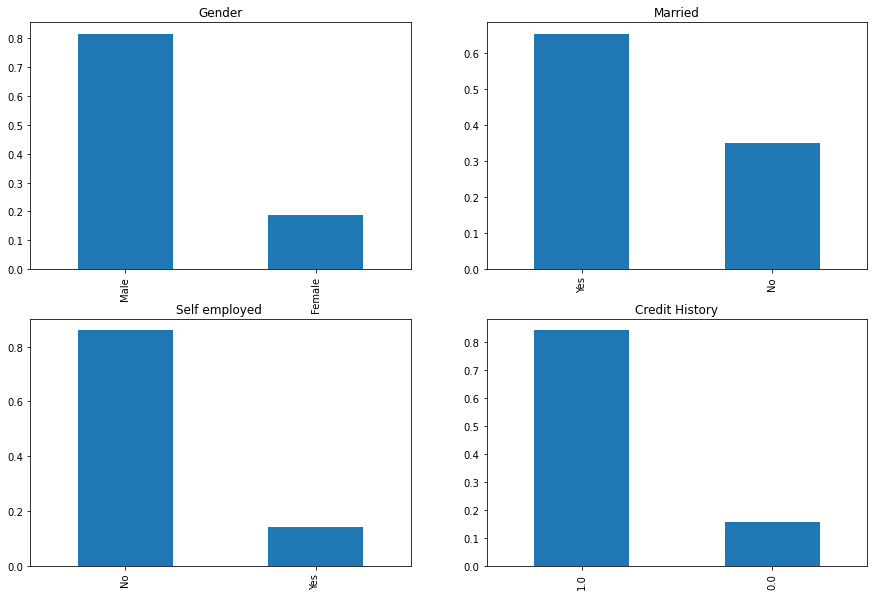

In [12]:
# visualize each categorial  variable seperately 
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(15,10), title= 'Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self employed ')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit History')
plt.show()

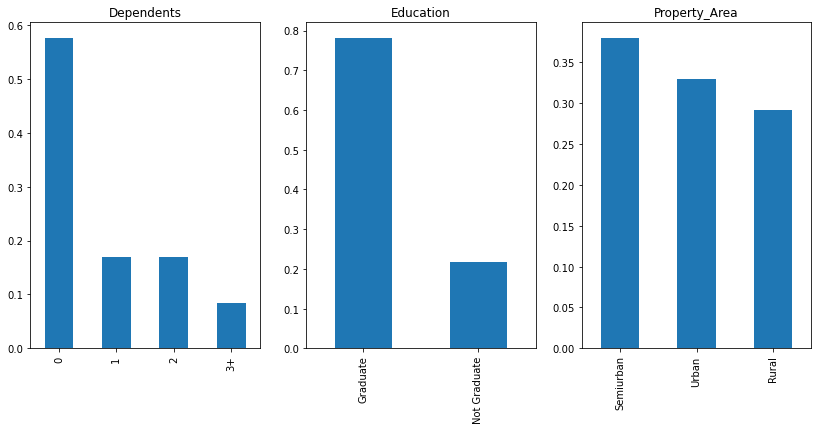

In [13]:
 
plt.subplot(131 )
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(14,6), title= 'Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')
plt.show()

In [14]:
import seaborn as sns   

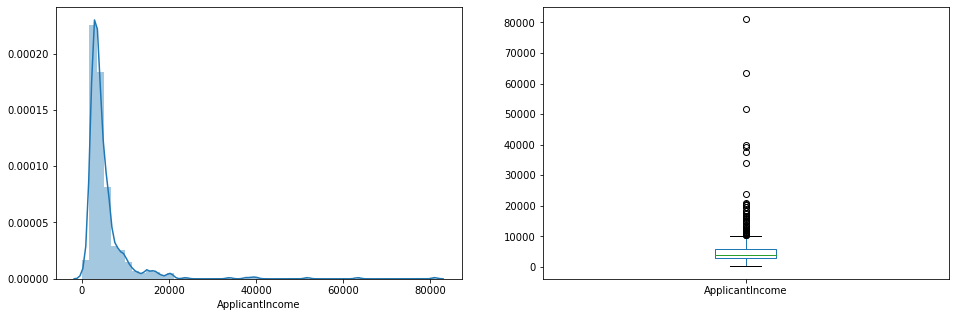

In [15]:
# visualize numerials variables
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

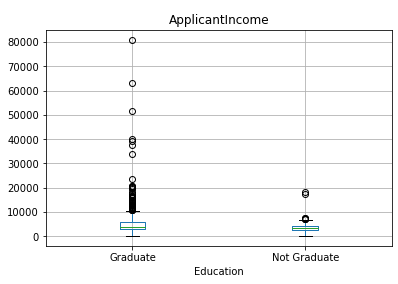

In [16]:

train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle(" ")
plt.show()

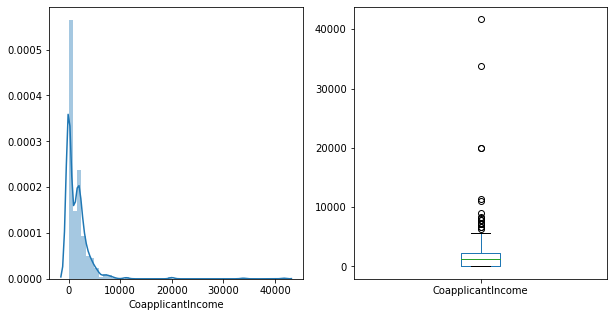

In [17]:
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(10,5))
plt.show()

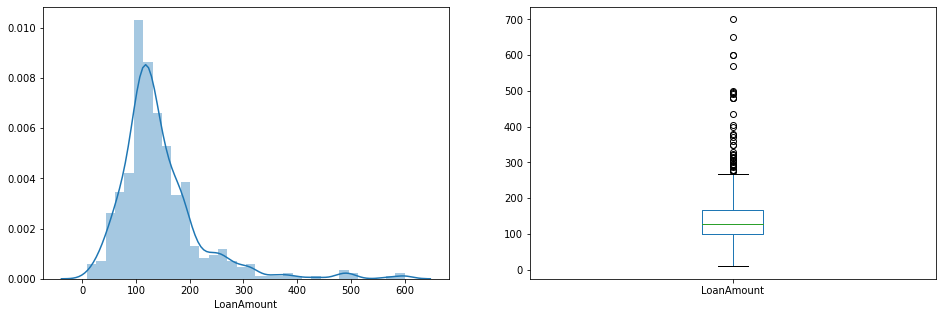

In [18]:
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

In [19]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])


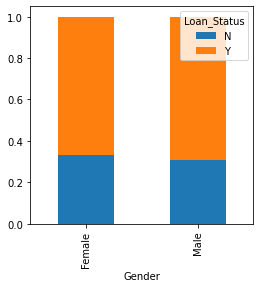

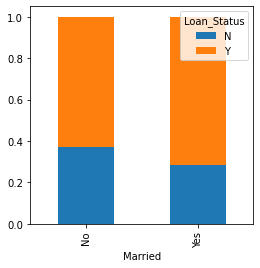

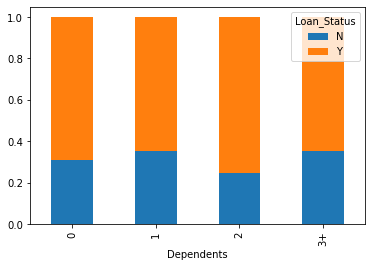

In [20]:

Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()


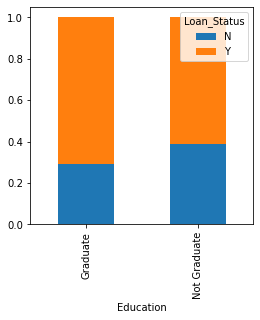

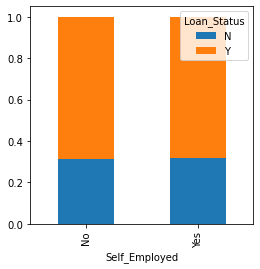

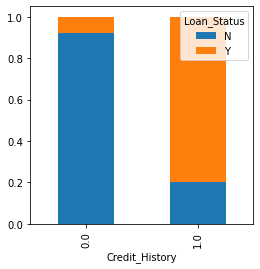

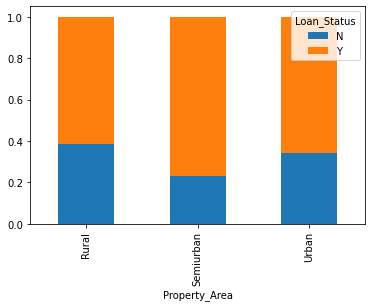

In [21]:
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

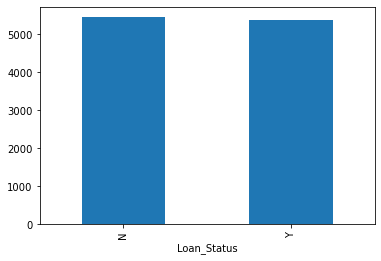

In [22]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.show()

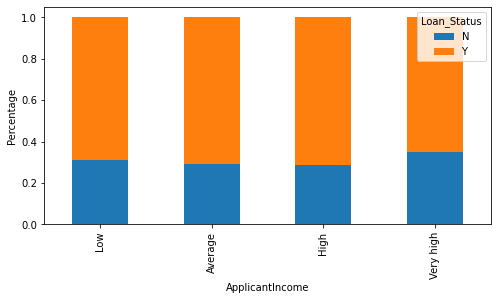

In [23]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(8,4))
plt.xlabel('ApplicantIncome') 
p =plt.ylabel ('Percentage')
 

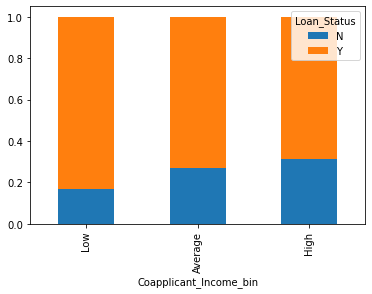

In [24]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

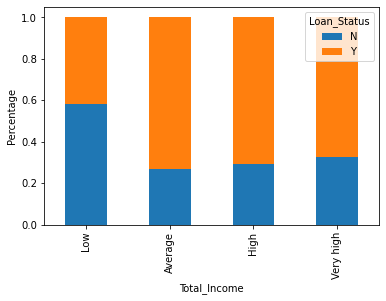

In [25]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')
plt.show()

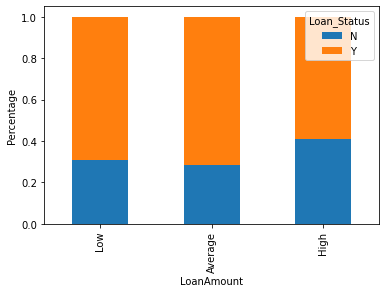

In [26]:

bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

In [27]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [28]:
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)


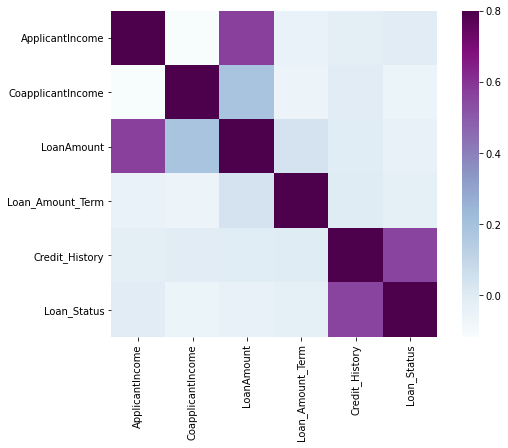

In [29]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");
plt.show()

Missing Value and Outlier Treatment

In [30]:
#missing value implementation 
#listening the missing value features wise 

print(train.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64



One of the easiest ways to handle missing or corrupted data is to drop those rows or columns
or replace them entirely with some other value.

There are two useful methods in Pandas:

1. IsNull() and dropna() will help to find the columns/rows with missing data and drop them
2. Fillna() will replace the wrong values with a placeholder value


For numerical value :: mean & median 
For categorial value :: mode 

In [31]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

print('-------')
print(train.isnull().sum())

-------
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


#Now lets fill the missing value in test datasets 

In [32]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#Outlier Treatment

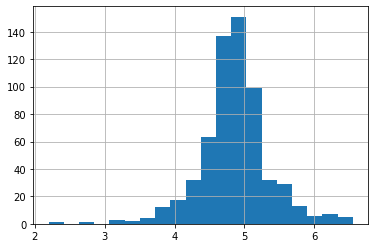

In [33]:
#log transformation to outlier treatment 
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

plt.show()

# Evaluation Metrics for Classification Problems

 

Evaluation metrics explain the performance of a model
Evaluating a model is a core part of building an effective machine learning model
There are several evaluation metrics, like confusion matrix, cross-validation, AUC-ROC curve, etc.
Different evaluation metrics are used for different kinds of problems

# Building model 

1> Logistic Regression 

In [34]:
#drop the uneffected feautres from datasets 
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [35]:
#target variables in seperate datasets 

X = train.drop('Loan_Status',1) 
y = train.Loan_Status   

DUMMIES :: it turns categorial value into series of 0 & 1.
Gender_male = 0  && Gender_Female =1

In [36]:
X=pd.get_dummies(X)
train=pd.get_dummies(X)
test=pd.get_dummies(test)

In [37]:
# split data into training set and a temporary set using sklearn.model_selection.traing_test_split
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [38]:
train.shape, test.shape, x_cv.shape
print("Training instances   {}, Training features   {}".format(x_train.shape[0], train.shape[1]))
print("Validation instances {}, Validation features {}".format(x_cv.shape[0], x_cv.shape[1]))
print("Testing instances    {}, Testing features    {}".format(test.shape[0], test.shape[1]))

Training instances   429, Training features   21
Validation instances 185, Validation features 21
Testing instances    367, Testing features    21


In [39]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, random_state=1,
                   solver='liblinear')

In [40]:
#prediction for validation datasets 
pred_cv = model.predict(x_cv)

#check its accuracy 
accuracy_score(y_cv,pred_cv)

0.8

In [41]:
# Let's make predicition for test datasets 
pred_test = model.predict(test)

Importing submission file

we need Load_Id and corrosponding Loan_status for final submission

In [42]:
submission=pd.read_csv("sample_submission_49d68Cx.csv")
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [43]:
# final output in Y & N
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)


In [44]:
# change into CSV file 
#pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [48]:
submission.reset_index(drop=True, inplace=True)

In [49]:
submission.index = [x for x in range(1, len(submission.values)+1)]

In [50]:
submission.head()

,Loan_ID,Loan_Status
1,LP001015,Y
2,LP001022,Y
3,LP001031,Y
4,LP001035,Y
5,LP001051,Y


In [51]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('LogisticRegression.csv')